In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import functions #functions is a library with functions specific to this pipeline

# Dataframes

In [2]:
# import data
df_all = pd.read_csv('dataframes/pos_df.csv')
df_all.head()

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [3]:
# import experiment metadata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.head()

,Exp,Mutation
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


In [4]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta2.csv')
df_meta.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer,>=3
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,Hex_Cer,2
2,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,Hex_Cer,2
3,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,Hex_Cer,0
4,Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer,26,0,Hex_Cer,0


In [5]:
# rename columns by KO (metada in df_exps)
df_all = functions.df_p(df_all, df_exps)
df_all.head()

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,184.3462,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,13.8507,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,224.9824,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,51.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,214.6494,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [6]:
# dataframe with all KO
df = df_all.drop(['CAV', 'CAVIN', 'RAJU', 'Flot2'], axis = 1)
df.head()

Mutation,CAS9,CAS9,CAS9,CAS9,CERS2_mg,CERS2_mg,CERS2_mg,CERS2_mg,CERS2-1g,CERS2-1g,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,201.8513,202.3676,148.7205,198.0178,236.0000,164.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,0.0000,6.0106,25.3693,0.0000,11.4067,20.1640,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,278.3933,268.3081,277.4941,336.4161,282.5303,234.4398,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,40.0000,47.0000,54.0000,42.0000,59.0000,42.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,191.0938,277.9832,177.4280,247.4005,198.1634,193.2640,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [7]:
# dataframe with only CAS9 & WT
df_cw = df[['CAS9', 'WT']]
df_cw.head()

Mutation,CAS9,CAS9,CAS9,CAS9,WT,WT,WT,WT
Sample Name,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,229.5233,278.1255,206.0000,182.0000
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,10.8768,6.0672,0.0000,34.4747
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,329.9421,313.2847,251.0406,226.8066
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,62.0000,57.0000,51.0000,40.0000
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,304.3199,271.4133,303.6544,253.3654


In [8]:
# dataframe with all KO
df_c = df_all.drop(['RAJU', 'Flot2'], axis = 1)
df_c.head()

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,184.3462,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,13.8507,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,224.9824,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,51.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,214.6494,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


# PCA

### Standardize data (across row)

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [10]:
lipids = df.index
df_standardized = df.T
exps = df_standardized.index


x = df_standardized.values
print(x.shape)
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

(28, 6278)


((28, 6278), np.float64(0.0), np.float64(0.9999999999999999))

In [11]:
df.T

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
Mutation,,,,,,,,,,,,,,,,,,,,,
CAS9,167.0000,53.2158,167.8122,54.0000,391.2240,45.8640,34.0231,18.0000,18.0658,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAS9,143.0000,52.8015,131.3388,47.0000,326.4641,46.9869,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAS9,125.0000,47.4908,220.0689,39.0000,444.7720,93.5817,0.0000,14.1298,30.0390,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAS9,132.0000,76.2783,128.3439,44.0000,385.3202,45.0573,31.9383,0.0000,32.0000,14.3392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CERS2_mg,201.8513,0.0000,278.3933,40.0000,191.0938,51.3064,21.9685,0.0000,8.1715,17.5317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CERS2_mg,202.3676,6.0106,268.3081,47.0000,277.9832,23.7093,0.0000,39.9918,16.6715,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CERS2_mg,148.7205,25.3693,277.4941,54.0000,177.4280,2.1372,0.0000,31.8877,30.0061,6.7846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CERS2_mg,198.0178,0.0000,336.4161,42.0000,247.4005,32.8839,21.0162,0.0000,47.6928,5.6297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CERS2-1g,236.0000,11.4067,282.5303,59.0000,198.1634,30.9737,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_standardized = pd.DataFrame(x)
df_standardized = df_standardized.set_index(exps)
df_standardized.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6268,6269,6270,6271,6272,6273,6274,6275,6276,6277
Mutation,,,,,,,,,,,,,,,,,,,,,
CAS9,-0.007609,1.530941,-1.444920,0.344543,1.611502,0.038739,2.024543,0.515593,0.609343,-0.530157,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CAS9,-0.415281,1.512443,-2.097379,-0.204634,0.729251,0.099383,-0.723180,-0.805979,-0.702631,-0.530157,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CAS9,-0.721035,1.275336,-0.510119,-0.832265,2.341009,2.615806,-0.723180,0.231441,1.478861,-0.530157,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CAS9,-0.602131,2.560615,-2.150954,-0.439996,1.531073,-0.004828,1.856173,-0.805979,1.621273,2.281436,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CERS2_mg,0.584387,-0.844991,0.533224,-0.753811,-1.114954,0.332664,1.051007,-0.805979,-0.109200,2.907413,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CERS2_mg,0.593157,-0.576635,0.352814,-0.204634,0.068776,-1.157760,-0.723180,2.130247,0.508087,-0.530157,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CERS2_mg,-0.318111,0.287675,0.517139,0.344543,-1.301129,-2.322794,-0.723180,1.535238,1.476472,0.800150,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CERS2_mg,0.519270,-0.844991,1.571173,-0.596904,-0.347865,-0.662271,0.974099,-0.805979,2.760915,0.573700,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452
CERS2-1g,1.164449,-0.335714,0.607230,0.736813,-1.018642,-0.765435,-0.723180,-0.805979,-0.702631,-0.530157,...,-0.274988,-0.276937,-0.19245,-0.27713,-0.403575,-0.521382,-0.19245,-0.550731,-0.546981,-0.482452


### PCA - Dataframe

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca_lipids = PCA(n_components=10)
pca=pca_lipids.fit_transform(x)

In [15]:
# create dataframe with principal components
df_pca = pd.DataFrame(pca)
pcs = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10']
df_pca.columns=pcs
df_pca['Mutation'] = exps
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Mutation
0,41.832602,37.988409,-25.567780,20.508260,1.233059,4.087058,14.475765,-8.747867,-31.693720,42.279286,CAS9
1,43.096804,35.588812,-23.925170,12.253265,2.460463,-3.427265,53.510751,8.363956,30.204557,-19.290631,CAS9
2,43.099594,30.269735,-36.084176,20.665440,-17.066688,-1.057345,-40.387497,2.971435,-2.648474,-22.332702,CAS9
3,30.689403,21.901457,-26.373904,12.760201,-8.778157,2.848416,-21.586455,4.009170,-1.934251,-7.991083,CAS9
4,-26.537084,-3.492443,16.693630,20.086316,-10.974378,9.225619,10.802293,24.225052,-9.953850,-8.201073,CERS2_mg
5,-26.461045,-1.611283,18.548206,16.742709,-12.486751,9.147417,4.136577,16.592927,-4.280100,-0.818591,CERS2_mg
6,-22.757920,-10.039891,12.905194,24.590223,-15.625152,-2.209325,1.101130,30.604468,-14.608680,0.139075,CERS2_mg
7,-21.198433,-11.062169,11.125902,24.730096,-11.749407,-0.523997,-0.505992,17.452796,-2.132694,-0.301992,CERS2_mg
8,-15.759677,-18.385290,-3.560053,4.601329,4.617298,-4.181021,-2.268939,-3.023848,9.484129,-1.756585,CERS2-1g
9,-17.824878,-18.195262,-2.571596,1.016590,5.948942,-3.579193,-0.280509,0.427758,4.592791,-1.430309,CERS2-1g


### Explained Variance

In [16]:
ev = pca_lipids.explained_variance_ratio_
print('Explained variance per principal component:')
print('PC 1: {}\nPC 2: {}\nPC3: {}'.format(ev[0],ev[1],ev[2]))

Explained variance per principal component:
PC 1: 0.14871186385128773
PC 2: 0.10031488986648004
PC3: 0.09221982482283586


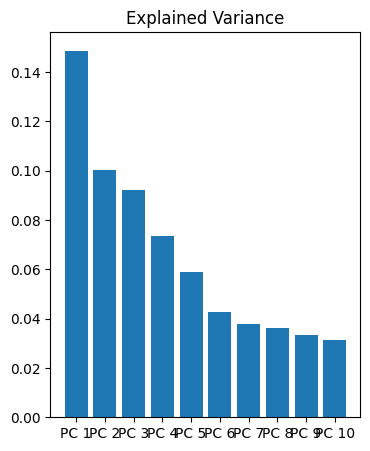

In [17]:
plt.figure(figsize=(4,5))
plt.bar(
    x=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'],
    height=ev
)
plt.title('Explained Variance')
plt.savefig('graphs/cas_wt/pca/ExplainedVarianceGraph.png', dpi=300, bbox_inches='tight')

### Vectors 

In [18]:
# which features contribute to each principal component? it has shape (n_components, n_features)

In [19]:
components_df = pd.DataFrame(pca_lipids.components_, columns=lipids, index=pcs)
components_df.head()

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
Principal Component 1,0.010721,0.012956,-0.006293,0.005108,0.015920,0.008441,-0.004108,-0.011584,-0.003643,-0.005066,...,-0.007362,-0.004352,-0.003027,-0.004355,0.005623,0.009261,-0.004663,0.015864,0.018902,0.014119
Principal Component 2,-0.029573,0.030124,-0.028586,-0.006675,0.024430,0.019757,0.024663,0.011640,0.019294,0.004183,...,0.028544,-0.002789,-0.001343,-0.002874,-0.008600,-0.008848,0.016567,-0.013257,-0.014572,-0.007460
Principal Component 3,0.010179,0.000348,0.013856,0.014320,-0.013292,-0.003778,-0.000680,0.004391,0.004277,0.009527,...,0.022766,0.001145,0.000726,0.001156,0.007798,0.013743,0.012936,0.016629,0.018115,0.018090
Principal Component 4,0.020101,0.006125,0.003127,0.014135,-0.011224,-0.006037,-0.003009,-0.002150,0.015625,0.018732,...,-0.015882,0.011249,0.007058,0.011362,0.000077,-0.006000,-0.010430,-0.012535,-0.016512,-0.015830
Principal Component 5,-0.004971,-0.011655,-0.016120,0.002116,-0.001636,0.023498,0.012391,-0.019671,-0.010542,-0.016228,...,-0.006661,0.035517,0.027276,0.035183,0.031636,0.028718,0.000823,0.021023,0.014853,0.011962


### PCA - graph

In [20]:
# function to create 95% confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

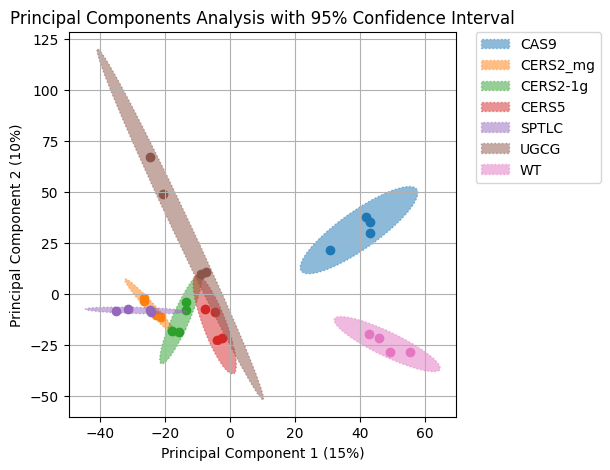

In [26]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(5,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Interval')
ax_nstd.set_xlabel('Principal Component 1 ({:.0%})'.format(ev[0]))
ax_nstd.set_ylabel('Principal Component 2 ({:.0%})'.format(ev[1]))
plt.show()
#ax_nstd.figure.savefig('graphs/cas_wt/pca/PCA.png', dpi=300, bbox_inches='tight')

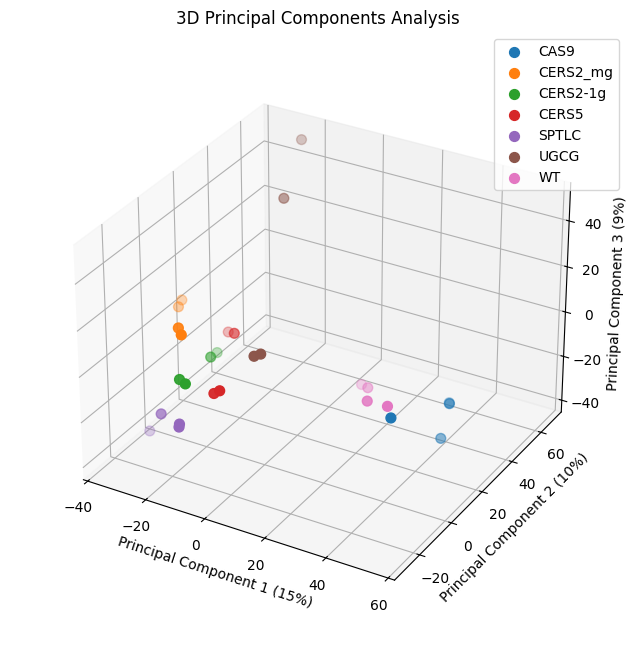

In [28]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    z = df_pca[df_pca['Mutation'] == protein]['Principal Component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 ({:.0%})'.format(ev[0]))
ax_nstd.set_ylabel('Principal Component 2 ({:.0%})'.format(ev[1]))
ax_nstd.set_zlabel('Principal Component 3 ({:.0%})'.format(ev[2]))
plt.show()
#ax_nstd.figure.savefig('graphs/cas_wt/pca/3D_PCA.png', dpi=300, bbox_inches='tight')

# Head Group

## Donut Charts

### All Head Groups

#### All KO

In [18]:
h = functions.norm_long(df_meta, df, var='Head Group 2', renamed_var='Head Group', norm_var=False)
# h.head()

In [19]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_list.append(donut)

d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:]) & heads
d = d.properties(title=alt.Title('Average Percentage of Head Group'))
d.save('graphs/cas_wt/head_group/Donut_Charts_AllHG.png', ppi=300)
d

alt.VConcatChart(...)

#### CAS9 vs WT Only

In [20]:
h = functions.norm_long(df_meta, df_cw, var='Head Group 2', renamed_var='Head Group', norm_var=False)
# h.head()

In [21]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_list.append(donut)

d = alt.hconcat(*chart_list) & heads
d = d.properties(title=alt.Title('Average Percentage of Head Group'))
d.save('graphs/cas_wt/head_group/Donut_Charts_AllHG_CAS_WT.png', ppi=300)
d

alt.VConcatChart(...)

### No PE/PC/SM/PS

#### All KO

In [22]:
h_dropped = functions.norm_long(df_meta, df, var='Head Group 2', renamed_var='Head Group', drop_var=['PC', 'PE', 'PS', 'SM'], norm_var=False)

In [23]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h_dropped).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in h_dropped['Mutation'].unique():
    source = h_dropped[h_dropped['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_list.append(donut)

d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:]) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'],  'subtitle':['PE/PC/PS/SM removed']})
d.save('graphs/cas_wt/head_group/Donut_Charts_NoPEPCPSSM.png', ppi=300)
d

alt.VConcatChart(...)

#### CAS9 vs WT Only

In [24]:
h_dropped = functions.norm_long(df_meta, df_cw, var='Head Group 2', renamed_var='Head Group', drop_var=['PC', 'PE', 'PS', 'SM'], norm_var=False)

In [25]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h_dropped).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in h_dropped['Mutation'].unique():
    source = h_dropped[h_dropped['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_list.append(donut)

d = alt.hconcat(*chart_list) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'],  'subtitle':['PE/PC/PS/SM removed']})
d.save('graphs/cas_wt/head_group/Donut_Charts_NoPEPCPSSM_CAS_WT.png', ppi=300)
d

alt.VConcatChart(...)

### Z-Score - CAS9 vs WT

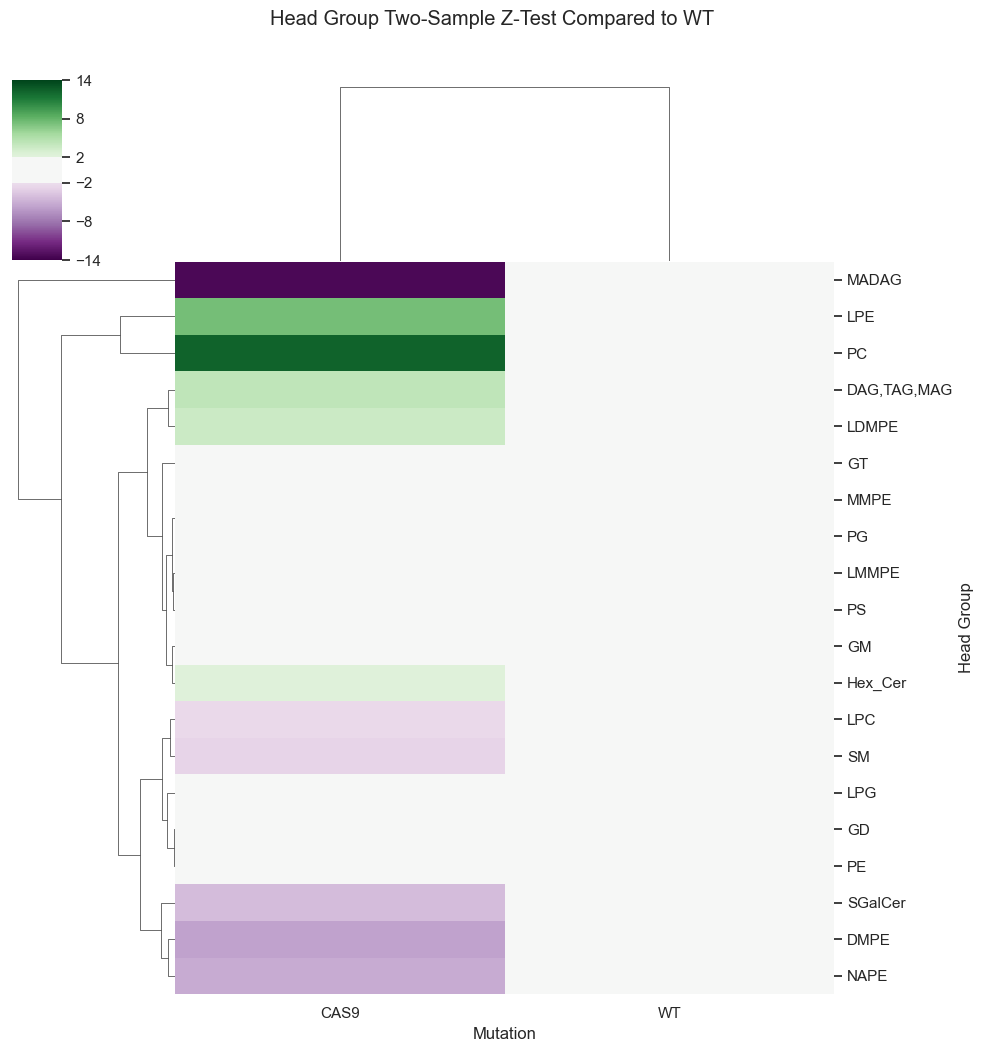

In [28]:
hg_z = functions.z_score(df_meta,
                         df_cw,
                         var = 'Head Group 2',
                         renamed_var='Head Group',
                         ctrl = 'WT',
                         row_cluster=True,
                         outlier=False)
plt.savefig('graphs/cas_wt/head_group/ZScore_AllHG_CAS_WT.png')

# Chain Length

In [35]:
# long form of dataset for histogram w/ error bars
ptnstd = functions.norm_long(df_meta, df_cw, 'Acyl Chain Length')
#ptnstd.head()

In [34]:
# groupby table for bimodal gaussian
ptns = functions.groupby_norm(df_meta, df_cw, 'Acyl Chain Length', norm_var=False).reset_index()
#ptns.head()

## Histogram w/ Bimodal Gaussian

In [36]:
from scipy.optimize import curve_fit

### Side by Side

In [37]:
chart_list = []
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

for protein in ptnstd['Mutation'].unique():
    source = ptnstd[ptnstd['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.26]),
    ).properties(title=protein)
    
    # create gaussian
    x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    x1 = x[(x < 51) & (x >= 20)]
    y1 = ptns[protein].loc[x1.index]
    x2 = x[(x >= 51)]
    y2 = ptns[protein].loc[x2.index]
    
    n1 = sum(y1)
    mean1 = sum(x1*y1)/n1                  
    sigma1 = sum(y1*(x1-mean1)**2)/n1
    a1 = max(y1)
    
    n2 = sum(y2)                         
    mean2 = sum(x2*y2)/n2                  
    sigma2 = sum(y2*(x2-mean2)**2)/n2
    a2=max(y2)
    
    expected = [mean1, sigma1, a1, mean2, sigma2, a2]
    # print(protein, expected)
    
    popt,pcov = curve_fit(bimodal,x,y,p0=expected)
    
    xx = np.linspace(10, 60, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'y':bimodal(xx, *popt)})
    
    gaus = alt.Chart(s).mark_line(color='red').encode(
        x='Acyl Chain Length:Q',
        y='y:Q'
    )
    
    text1 = alt.Chart({'values':[{}]}).mark_text(
        align="left", baseline="top"
    ).encode(
        x=alt.value(5),  # pixels from left
        y=alt.value(5),  # pixels from top
        text=alt.value([f"mu1: {popt[0]:.3f}", f"sigma1: {popt[1]:.3f}", f"a1: {popt[2]:.3f}"])
    )
    
    text2 = alt.Chart({'values':[{}]}).mark_text(
        align="left", baseline="top"
    ).encode(
        x=alt.value(230),  # pixels from left
        y=alt.value(5),  # pixels from top
        text=alt.value([f"mu2: {popt[3]:.3f}", f"sigma2: {popt[4]:.3f}", f"a2: {popt[5]:.3f}"])
    )
    
    # append to chart list
    chart = bar + err + gaus + text1 + text2
    
    chart_list.append(chart)
    
ss_bimodal = alt.hconcat(*chart_list[:])
ss_bimodal.save('graphs/cas_wt/chain_length/Histogram_SidebySide.png', ppi=300)
ss_bimodal

alt.HConcatChart(...)

### Overlapping

In [38]:
chart_list_o = []
line_chart_only = []
# list of colors + counter to move to next color
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
i=0
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

for protein in ptnstd['Mutation'].unique():
    source = ptnstd[ptnstd['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev', opacity=0.3).encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar(opacity=0.3).encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.26]),
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # create gaussian
    x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    x1 = x[(x < 51) & (x >= 20)]
    y1 = ptns[protein].loc[x1.index]
    x2 = x[(x >= 51)]
    y2 = ptns[protein].loc[x2.index]
    
    n1 = sum(y1)
    mean1 = sum(x1*y1)/n1                  
    sigma1 = sum(y1*(x1-mean1)**2)/n1
    a1 = max(y1)
    
    n2 = sum(y2)                         
    mean2 = sum(x2*y2)/n2                  
    sigma2 = sum(y2*(x2-mean2)**2)/n2
    a2=max(y2)
    
    expected = [mean1, sigma1, a1, mean2, sigma2, a2]
    # print(protein, expected)
    
    popt,pcov = curve_fit(bimodal,x,y,p0=expected)
    
    xx = np.linspace(10, 60, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'Fraction':bimodal(xx, *popt), 'Mutation':([protein]*len(xx))})
    
    gaus = alt.Chart(s).mark_line(color=colors[i]).encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # append to chart list
    chart = bar + err + gaus
    chart_list_o.append(chart)
    line_chart_only.append(gaus)
    
    
    # use next color in colors list
    i += 1

In [39]:
o_bimodal = alt.layer(*chart_list_o[:]).properties(title='Chain Length Distribution', width=400, height=400)
o_bimodal.save('graphs/cas_wt/chain_length/Histogram_Overlap.png', ppi=300, engine='vl-convert')
o_bimodal

alt.LayerChart(...)

In [40]:
l_bimodal = alt.layer(*line_chart_only[:]).properties(title='Chain Length Distribution', width=400, height=400)
l_bimodal.save('graphs/cas_wt/chain_length/GaussianCurve_Overlap.png', ppi=300, engine='vl-convert')
l_bimodal

alt.LayerChart(...)

### Z-Score

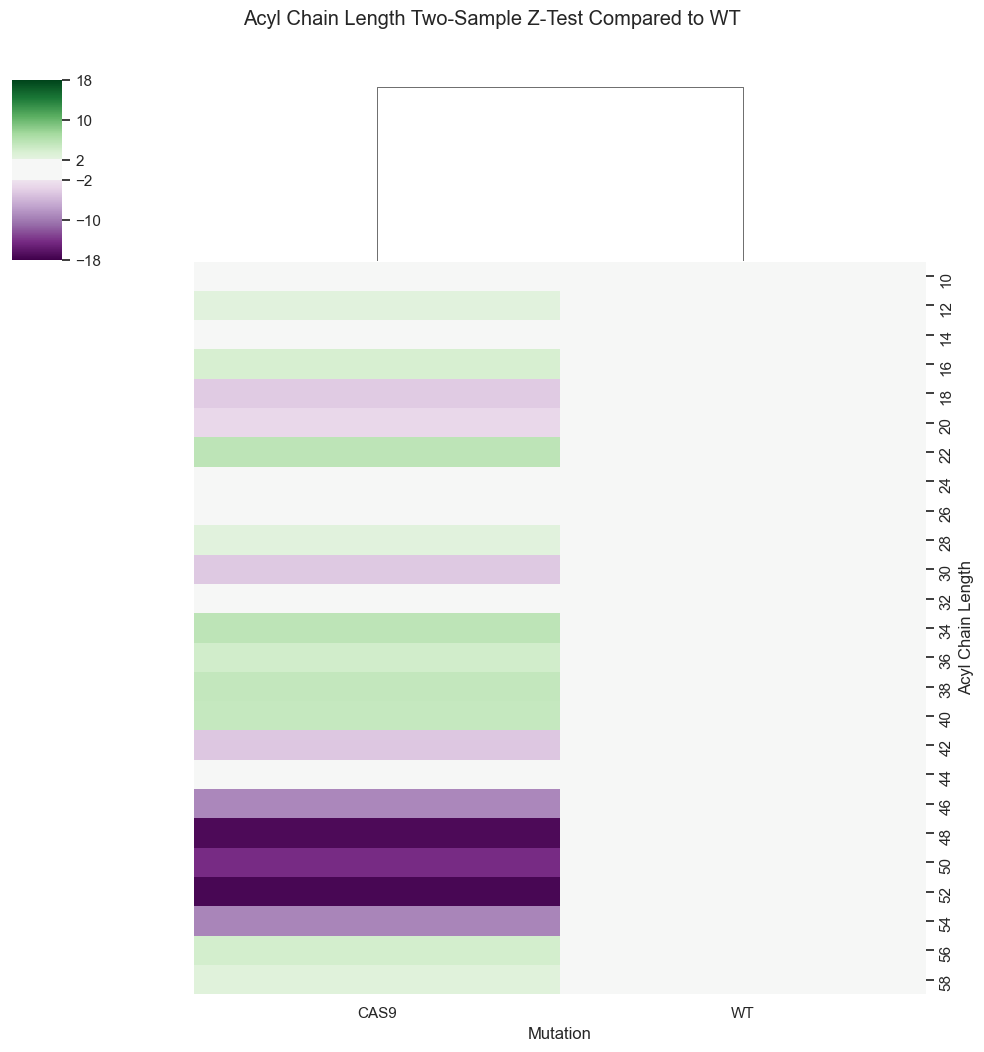

In [41]:
cl_z = functions.z_score(df_meta,
                         df_cw,
                         var = 'Acyl Chain Length',
                         drop_var = list(range(1,70,2)),
                         ctrl = 'WT',
                         row_cluster=False,
                         outlier = False)
plt.savefig('graphs/cas_wt/chain_length/ZScore.png')

### Odds

#### All KO

In [44]:
# long form of dataset for histogram w/ error bars
ptnstd_all = functions.norm_long(df_meta, df, 'Acyl Chain Length')
#ptnstd.head()

In [45]:
odds_long = ptnstd_all[ptnstd_all['Acyl Chain Length'] % 2 != 0]
odds_long.head()

,Mutation,Acyl Chain Length,Fraction
256,CAS9,25,0.000085
257,CAS9,25,0.000086
258,CAS9,25,0.000110
259,CAS9,25,0.000097
260,CERS2_mg,25,0.000082


In [50]:
chart_list = []
for protein in odds_long['Mutation'].unique():
    source = odds_long[odds_long['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:N',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:N',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.04]),
    ).properties(title=protein)
    
    # append to chart list
    chart = bar + err
    
    chart_list.append(chart)
    
# odds_distribution = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]
# odds_distribution

odds_distribution2 = alt.hconcat(*chart_list[:4]) & alt.hconcat(*chart_list[4:8]) & alt.hconcat(*chart_list[8:])
odds_distribution2.save('graphs/cas_wt/chain_length/OddChainLengths.png', ppi=300)
odds_distribution2

alt.VConcatChart(...)

#### CAS9 vs WT

In [51]:
odds_long_cw = ptnstd[ptnstd['Acyl Chain Length'] % 2 != 0]
odds_long_cw.head()

,Mutation,Acyl Chain Length,Fraction
64,CAS9,25,0.000085
65,CAS9,25,0.000086
66,CAS9,25,0.000110
67,CAS9,25,0.000097
68,WT,25,0.000104


In [52]:
chart_list = []
for protein in odds_long_cw['Mutation'].unique():
    source = odds_long_cw[odds_long_cw['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:N',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:N',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.04]),
    ).properties(title=protein)
    
    # append to chart list
    chart = bar + err
    
    chart_list.append(chart)
    
# odds_distribution = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]
# odds_distribution

odds_distribution_cw = alt.hconcat(*chart_list)
odds_distribution_cw.save('graphs/cas_wt/chain_length/OddChainLengths_CAS_WT.png', ppi=300)
odds_distribution_cw

alt.HConcatChart(...)

# PCA

### Standardize data (across row)

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
df_standardized = df_c.T
exps = df_standardized.index

x = df_standardized.values
print(x.shape)
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

(40, 6278)


((40, 6278), np.float64(4.4408920985006264e-17), np.float64(1.0))

### PCA - Dataframe

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca_lipids = PCA(n_components=3)
pca=pca_lipids.fit_transform(x)

In [19]:
# create dataframe with principal components
df_pca = pd.DataFrame(pca)
pcs = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
df_pca.columns=pcs
df_pca['Mutation'] = exps
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Mutation
0,42.532104,-16.695005,45.577346,CAS9
1,44.597737,-15.266385,43.050442,CAS9
2,47.995389,-18.511102,39.699106,CAS9
3,34.156205,-13.784005,27.363795,CAS9
4,-13.680465,-12.925100,-8.453124,CAV
5,-16.082219,-13.525793,-8.634651,CAV
6,-18.948674,-44.326222,24.155026,CAV
7,-18.620811,-44.640273,22.057601,CAV
8,10.882937,13.382192,-1.948966,CAVIN
9,10.245521,11.686260,-3.978627,CAVIN


### Explained Variance

In [20]:
ev = pca_lipids.explained_variance_ratio_
print('Explained variance per principal component:')
print('PC 1: {}\nPC 2: {}\nPC3: {}'.format(ev[0],ev[1],ev[2]))

Explained variance per principal component:
PC 1: 0.11988295731180053
PC 2: 0.08352153247367158
PC3: 0.07443795675054882


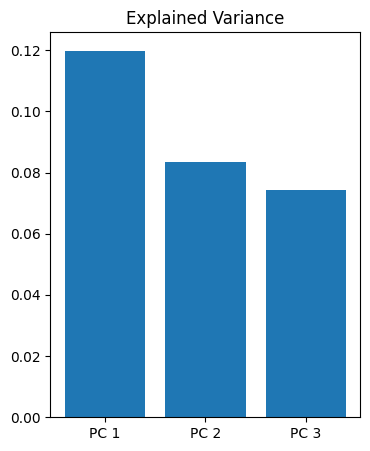

In [21]:
plt.figure(figsize=(4,5))
plt.bar(
    x=['PC 1', 'PC 2', 'PC 3'],
    height=ev
)
plt.title('Explained Variance')
plt.savefig('graphs/cas_wt/pca/ExplainedVarianceGraph.png', dpi=300, bbox_inches='tight')

### PCA - graph

In [22]:
# function to create 95% confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

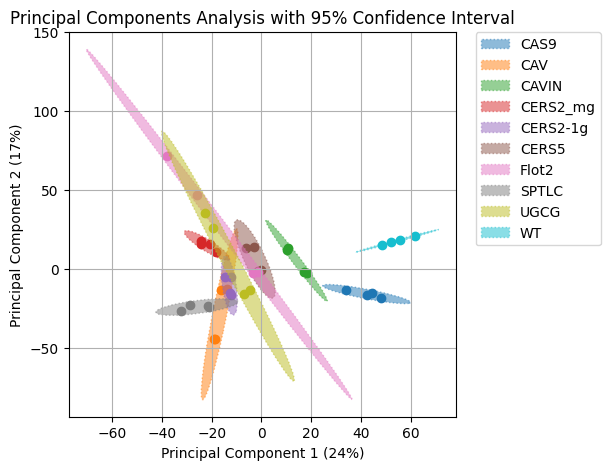

In [23]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(5,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Interval')
ax_nstd.set_xlabel('Principal Component 1 (24%)')
ax_nstd.set_ylabel('Principal Component 2 (17%)')
plt.show()
ax_nstd.figure.savefig('graphs/cas_wt/pca/PCA.png', dpi=300, bbox_inches='tight')

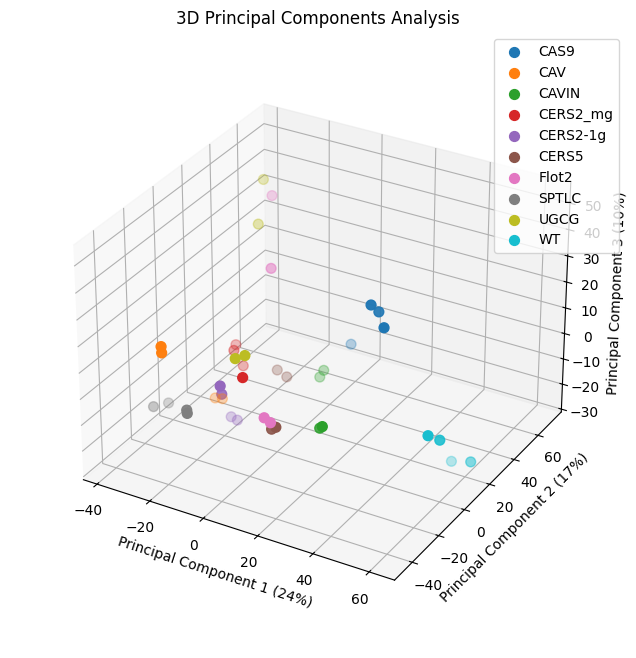

In [24]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    z = df_pca[df_pca['Mutation'] == protein]['Principal Component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 (24%)')
ax_nstd.set_ylabel('Principal Component 2 (17%)')
ax_nstd.set_zlabel('Principal Component 3 (10%)')
plt.show()
ax_nstd.figure.savefig('graphs/cas_wt/pca/3D_PCA.png', dpi=300, bbox_inches='tight')